In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/BTC_PRICE_ALL_graph.csv",parse_dates=["Date"],index_col=["Date"])

In [3]:
data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
data.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
len(data)

2787

In [7]:
bitcoin_price=pd.DataFrame(data["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"price"})

In [8]:
bitcoin_price.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


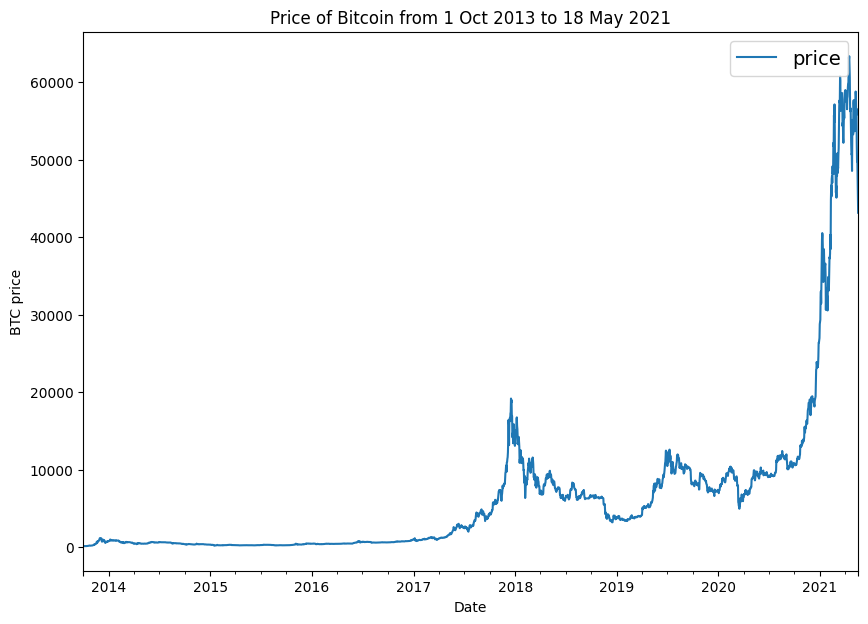

In [9]:

import matplotlib.pyplot as plt

bitcoin_price.plot(figsize=(10,7))
plt.ylabel("BTC price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021")
plt.legend(fontsize=14)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price["price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
split_size=int(0.8*len(prices))

#creating train and test split
X_train , y_train = timesteps[:split_size], prices[:split_size]

X_test , y_test = timesteps[split_size:], prices[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)


(2229, 558, 2229, 558)

In [12]:
#creating function to visualize the timeseries data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

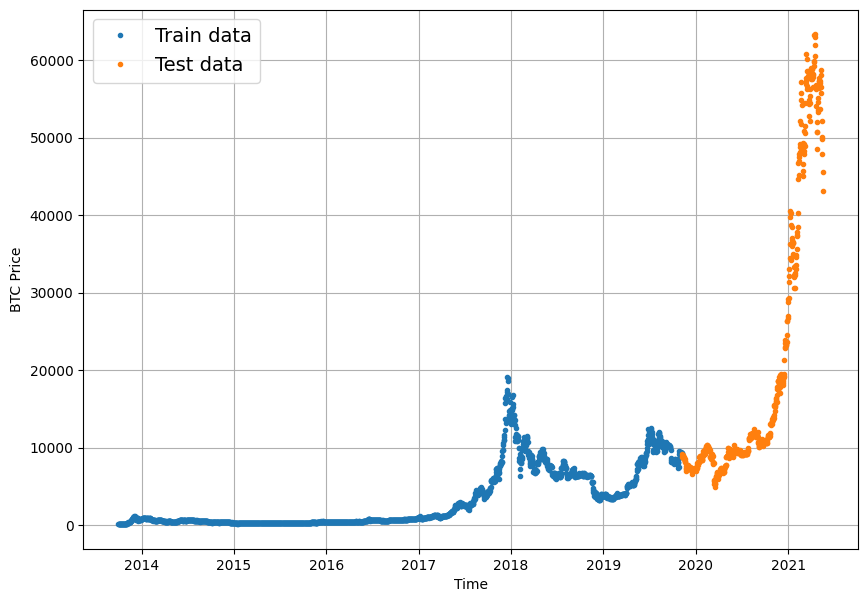

In [13]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Forcasting Methods


## Statistical Models


### 1. **Naive method**
   
   Formula: $$\hat{y}_{t}=y_{t-1}$$

In [14]:
naive_forecast=y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]


(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [15]:
y_test[:10],y_test[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

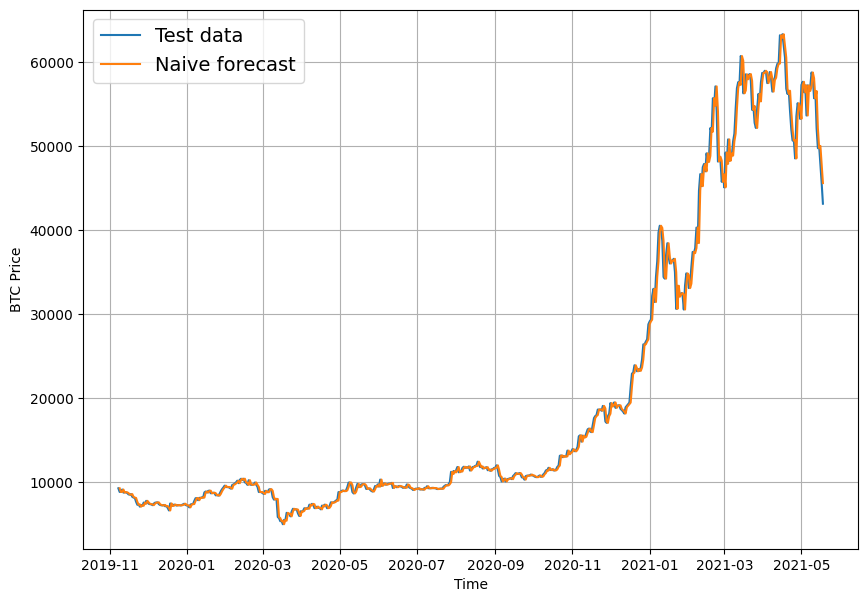

In [16]:
plt.figure(figsize=(10,7))
#plot_timeseries(timesteps=X_train, value=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test,format="-",label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [17]:
#Evaluating model 1 (naive method)
import tensorflow as tf

def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [18]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [19]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Moving Average

In [20]:
#taking window size as 3 for moving average
import numpy as np
ma_forecast=[]

for i in range(2,len(y_test)):
  avg = 1/3*(y_test[i]+y_test[i-1]+y_test[i-2])
  ma_forecast.append(avg)

moving_avg_forecast=np.array(ma_forecast)
moving_avg_forecast[:10],y_test[2:12]

(array([8939.62884001, 8891.19585921, 8863.58775743, 8851.20464527,
        8740.64921611, 8722.46141051, 8635.71169051, 8542.29179314,
        8502.41470301, 8404.13563895]),
 array([8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
        8749.52059102, 8656.97092235, 8500.64355816, 8469.2608989 ,
        8537.33965197, 8205.80636599]))

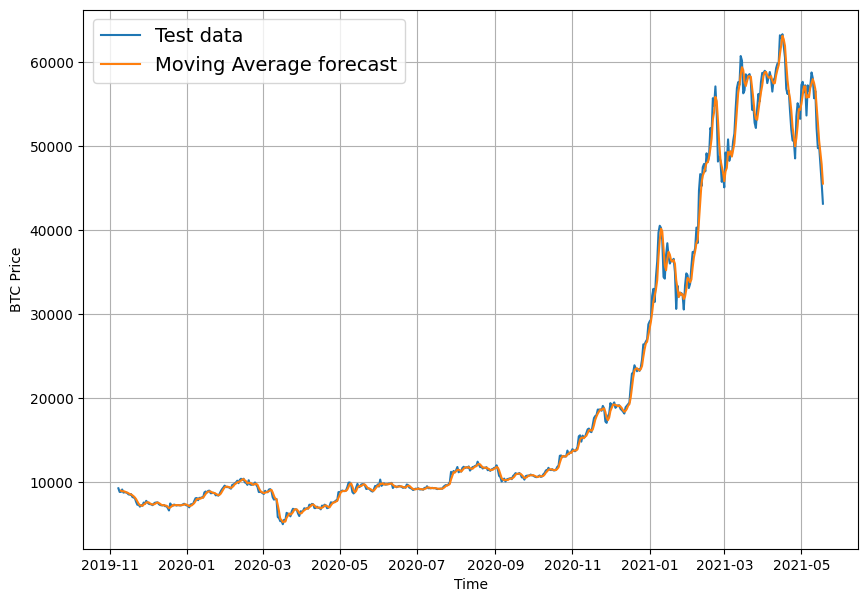

In [21]:
#visualizing the Moving average forecast and true value
plt.figure(figsize=(10,7))
#plot_timeseries(timesteps=X_train, value=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test,format="-",label="Test data")
plot_time_series(timesteps=X_test[2:], values=moving_avg_forecast, format="-", label="Moving Average forecast");

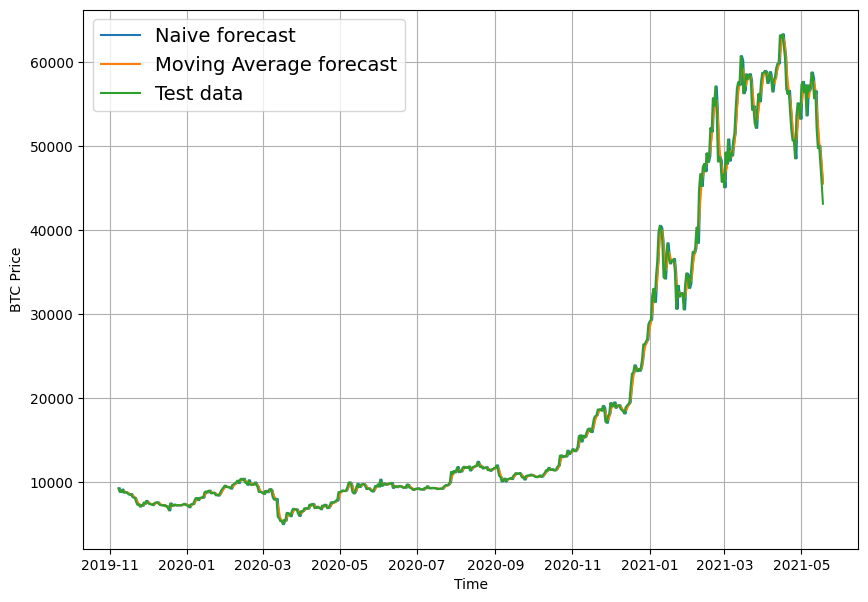

In [22]:
#visualizing naive and moving average forcast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");
plot_time_series(timesteps=X_test[2:], values=moving_avg_forecast, format="-", label="Moving Average forecast");
plot_time_series(timesteps=X_test, values=y_test,format="-",label="Test data")


In [23]:
#evaluating moving average model
ma_results = evaluate_preds(y_true=y_test[2:],
                               y_pred=moving_avg_forecast)
ma_results

{'mae': 427.49377,
 'mse': 633214.2,
 'rmse': 795.74756,
 'mape': 1.9073688,
 'mase': 0.7509882}

## Machine Learning or Deep Neural Models

### ARIMA (Auto Regressive Integrated Moving Average)

In [24]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.7 MB/s eta 0:00:00


In [25]:
from pmdarima.arima import auto_arima
model_3 = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model_3.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=31145.069, Time=2.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=31151.165, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31145.245, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31145.454, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=31149.717, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31148.703, Time=3.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=31148.844, Time=3.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=31147.107, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=31139.882, Time=3.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=31148.314, Time=0.76 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=31134.507, Time=1.72 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=31150.287, Time=0.55 sec
 ARIMA(2,1,4)(0,0,0)[0] inter

ARIMA(order=(2, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
arima_forecast = model_3.predict(n_periods=len(y_test))

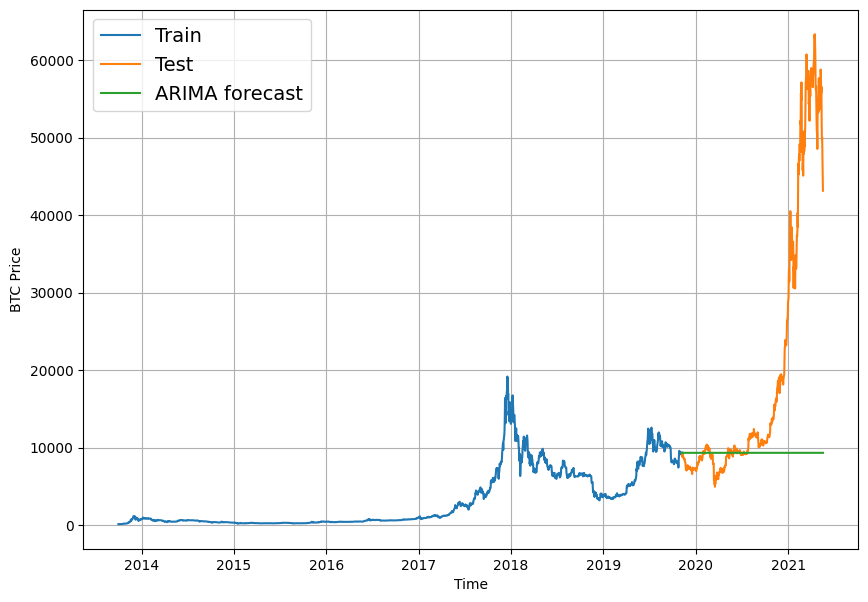

In [27]:
from tensorflow.python.ops.math_ops import Xdivy
#plot the predictions for validation set
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, format="-", label="Train");
plot_time_series(timesteps=X_test, values=y_test, format="-", label="Test");
plot_time_series(timesteps=X_test, values=arima_forecast,format="-",label="ARIMA forecast")

In [28]:
arima_results=evaluate_preds(y_true=y_test,
                               y_pred=arima_forecast)
arima_results

{'mae': 11710.447,
 'mse': 421757980.0,
 'rmse': 20536.746,
 'mape': 35.640682,
 'mase': 20.617702}

**setting up window size and horizon**

In [29]:
#setting up window size and horizon
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [30]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [31]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  #print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  #print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [32]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [33]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


**Turning windows into train and test set**

In [34]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [35]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

**Creating model checkpoint callback**

In [36]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file


### Dense Neural Model (Window_size = 7, Horizon 1)

- A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation

- An output layer with linear activation (or no activation) Adam optimizer and MAE loss function

- Batch size of 128

- 100 epochs

In [37]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

In [38]:
#construct the model
model_4 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_4_dense")

#compile the model
model_4.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics=["mae","mse"])

#Fit the model
model_4.fit(x=train_windows,
            y=train_labels,
            verbose=0,
            epochs=100,
            batch_size=128,
            validation_data=[test_windows,test_labels],
            callbacks=[create_model_checkpoint(model_name=model_4.name)],
            )

In [39]:
#evalaute
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 625.6362 - mae: 625.6362 - mse: 1285850.8750


[625.6361694335938, 625.6361694335938, 1285850.875]

In [40]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_dense/")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.7104 - mae: 570.7104 - mse: 1183119.0000


[570.7103881835938, 570.7103881835938, 1183119.0]

In [41]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [42]:
model_4_preds = make_preds(model_4, test_windows)
len(model_4_preds), model_4_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8870.051 , 8758.407 , 8988.441 , 8793.811 , 8718.8955, 8715.956 ,
        8673.857 , 8525.232 , 8437.63  , 8507.319 ], dtype=float32)>)

In [43]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_4_preds)
model_4_results

{'mae': 570.7104,
 'mse': 1183119.0,
 'rmse': 1087.7128,
 'mape': 2.5789347,
 'mase': 1.00258}

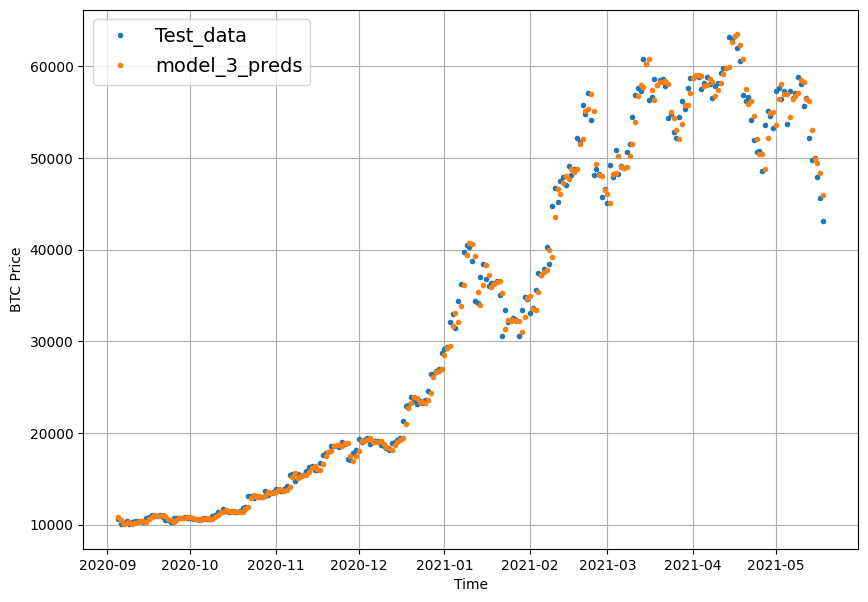

In [44]:
#visualizing model_3 result
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,format=".", label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_4_preds, start=offset, format=".", label="model_3_preds")

### Dense Neural Model (window_size = 30, Horizon = 7)

In [45]:
WINDOW_SIZE=30
HORIZON=1

In [46]:
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2757, 2757)

In [47]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [48]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_5 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_5_dense")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])



In [49]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 604.4243


604.42431640625

In [50]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_dense/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 604.4243


604.42431640625

In [51]:
model_5_preds = make_preds(model_5,
                           input_data=test_windows)
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_5_preds)


18/18 [==============================] - 0s 1ms/step


In [52]:
model_4_results,model_5_results

({'mae': 570.7104,
  'mse': 1183119.0,
  'rmse': 1087.7128,
  'mape': 2.5789347,
  'mase': 1.00258},
 {'mae': 604.4243,
  'mse': 1269298.8,
  'rmse': 1126.6316,
  'mape': 2.7377896,
  'mase': 1.0565397})

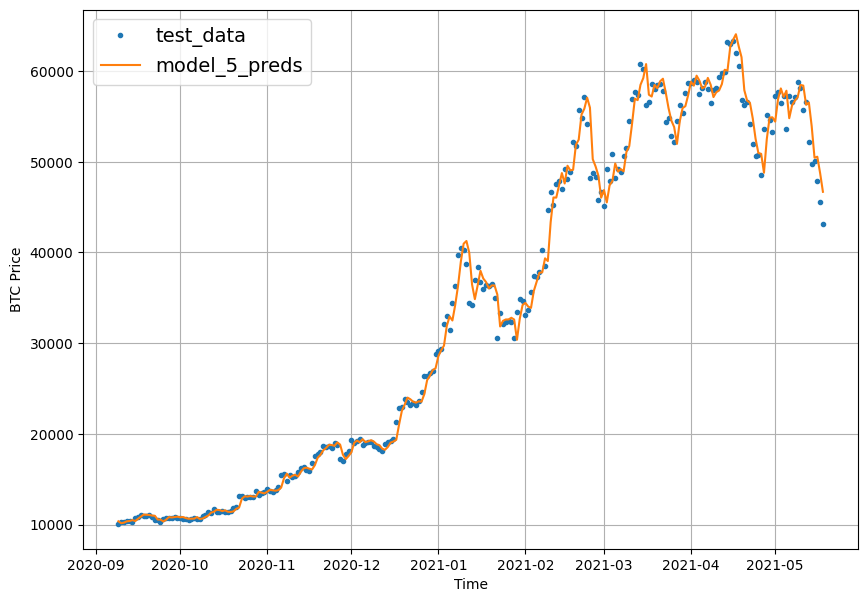

In [53]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_5_preds, start=offset, format="-", label="model_5_preds")


### Dense Neural Model (window-size = 30, horizon = 7)

In [54]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [55]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [56]:
tf.random.set_seed(42)

#create the model
model_6 = tf.keras.Sequential([
    layers.Dense(100,activation="relu"),
    layers.Dense(HORIZON)
],name="model_6_dense")

model_6.compile(loss="mae",optimizer = tf.keras.optimizers.Adam())

model_6.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_6.name)]
)

In [57]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense/")
model_6.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1245.8251


1245.8250732421875

In [58]:
model_6_preds = make_preds(model_6,
                           input_data=test_windows)
model_6_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9271.513, 9300.596, 9255.684, 9496.215, 9858.857, 9584.332,
        9542.409],
       [8936.342, 8907.31 , 8858.201, 9094.448, 9542.479, 9183.318,
        9308.999],
       [8817.56 , 8837.61 , 8796.344, 8877.632, 9234.206, 9033.373,
        9358.054],
       [8931.138, 8895.051, 9005.694, 9042.721, 9099.175, 9145.283,
        9427.31 ],
       [9058.507, 8901.864, 9014.56 , 9245.978, 9000.794, 9089.964,
        8981.259]], dtype=float32)>

In [59]:

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [60]:
# Get model_5 results aggregated to single values
model_6_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_6_preds)
model_6_results

{'mae': 1245.8251,
 'mse': 5534782.5,
 'rmse': 1432.1852,
 'mape': 5.671321,
 'mase': 2.2168758}

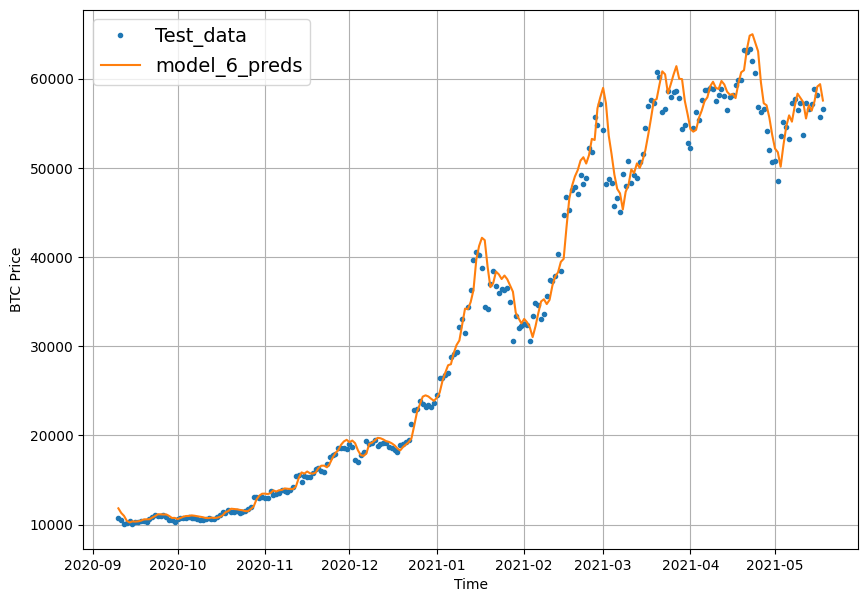

In [61]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_5_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_6_preds,axis=1),
                 format="-",
                 start=offset,
                 label="model_6_preds")

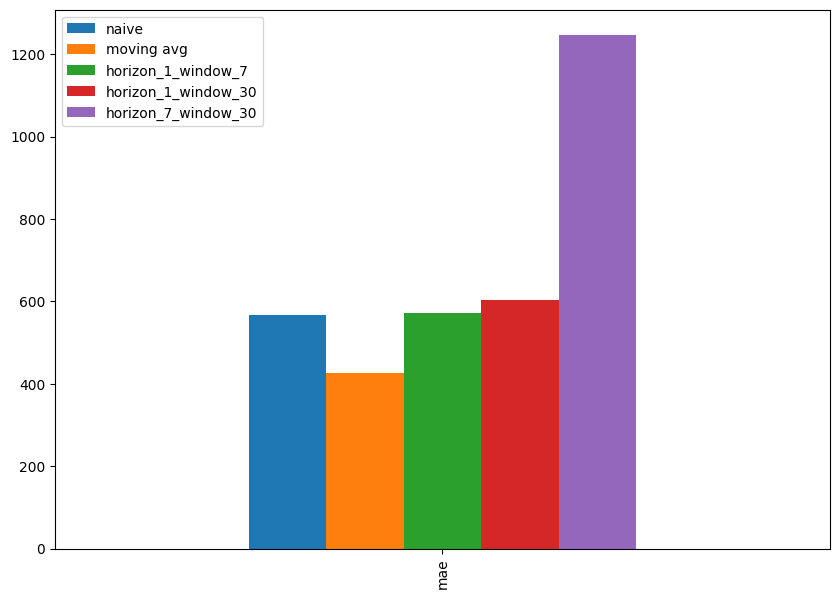

In [62]:
pd.DataFrame({"naive": naive_results["mae"],
              "moving avg":ma_results["mae"],
              "horizon_1_window_7": model_4_results["mae"],
              "horizon_1_window_30": model_5_results["mae"],
              "horizon_7_window_30": model_6_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


### Convulation Neural Network (with only 1 conv1D layer)

In [63]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [64]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [65]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2224, 556, 2224, 556)

In [66]:
#reshaping the input shape before feeding it to cnn layers
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [67]:
expand_dims_layer(x).shape

TensorShape([7, 1])

In [68]:
tf.random.set_seed(42)

# Create model
model_7 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_7_conv1D")

# Compile model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_7.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_7.name)])







In [69]:
model_7.summary()

Model: "model_7_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Load in best performing Conv1D model and evaluate it on the test data
model_7 = tf.keras.models.load_model("model_experiments/model_7_conv1D/")
model_7.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 568.1573


568.1572875976562

In [71]:
model_7_preds = make_preds(model_7, test_windows)
model_7_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_7_preds)
model_7_results


18/18 [==============================] - 0s 2ms/step


{'mae': 568.1573,
 'mse': 1171972.2,
 'rmse': 1082.5767,
 'mape': 2.5521364,
 'mase': 0.998095}

### CNN (baseline)

In [72]:
train_windows[:10],train_windows.shape

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966],
        [120.65533, 121.795  , 123.033  , 124.049  , 125.96116, 125.27966,
         125.9275 ],
        [121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333],
        [123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199],
        [124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333],
        [125.96116, 125.27966, 125.9275 , 126.38333, 135.24199, 133.20333,
         142.76333]]),
 (2224, 7))

In [73]:
type(train_windows)

numpy.ndarray

In [74]:
# reshape 2D input data into 3D data
features = 1

train_windowsX = train_windows.reshape((train_windows.shape[0],train_windows.shape[1],features))
test_windowsX = test_windows.reshape((test_windows.shape[0],test_windows.shape[1],features))

In [75]:
train_windowsX[:10]

array([[[123.65499],
        [125.455  ],
        [108.58483],
        [118.67466],
        [121.33866],
        [120.65533],
        [121.795  ]],

       [[125.455  ],
        [108.58483],
        [118.67466],
        [121.33866],
        [120.65533],
        [121.795  ],
        [123.033  ]],

       [[108.58483],
        [118.67466],
        [121.33866],
        [120.65533],
        [121.795  ],
        [123.033  ],
        [124.049  ]],

       [[118.67466],
        [121.33866],
        [120.65533],
        [121.795  ],
        [123.033  ],
        [124.049  ],
        [125.96116]],

       [[121.33866],
        [120.65533],
        [121.795  ],
        [123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966]],

       [[120.65533],
        [121.795  ],
        [123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]],

       [[121.795  ],
        [123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
 

In [76]:
#experimenting with cnn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model_8 = Sequential()
model_8.add(Conv1D(128,kernel_size=5,activation="relu",input_shape=(WINDOW_SIZE,1)))
model_8.add(MaxPooling1D(pool_size=2))
model_8.add(Flatten())
model_8.add(Dense(HORIZON))

model_8.compile(loss="mae",optimizer="adam")

model_8.fit(
    train_windowsX,
    train_labels,
    batch_size=128,
    epochs=100,
    verbose=0,
    validation_data=(test_windowsX, test_labels),
    callbacks=[create_model_checkpoint(model_name="model_8_cnn")]


)


In [77]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 128)            768       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 128)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_8 = tf.keras.models.load_model("model_experiments/model_8_cnn/")
model_8.evaluate(test_windowsX, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 908.7155


908.7155151367188

In [79]:
model_8_preds = make_preds(model_8, test_windowsX)
model_8_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_8_preds)
model_8_results

18/18 [==============================] - 0s 2ms/step


{'mae': 908.7154,
 'mse': 2737450.8,
 'rmse': 1654.5243,
 'mape': 4.0743494,
 'mase': 1.5963613}

In [80]:
model_8_results

{'mae': 908.7154,
 'mse': 2737450.8,
 'rmse': 1654.5243,
 'mape': 4.0743494,
 'mase': 1.5963613}

### CNN (with increased layers)

In [81]:
# adding more layers to cnn
model_9 = Sequential()
model_9.add(Conv1D(128,kernel_size=5,padding="same",activation="relu",input_shape=(WINDOW_SIZE,1)))
model_9.add(Conv1D(128,kernel_size=5,padding="same",activation="relu"))
model_9.add(MaxPooling1D(pool_size=2))
model_9.add(Conv1D(128,kernel_size=5,padding="same",activation="relu"))
model_9.add(MaxPooling1D(pool_size=2))
model_9.add(Flatten())
model_9.add(Dense(HORIZON))

model_9.compile(loss="mae",optimizer="adam")

model_9.fit(
    train_windowsX,
    train_labels,
    batch_size=128,
    epochs=100,
    verbose=0,
    validation_data=(test_windowsX, test_labels),
    callbacks=[create_model_checkpoint(model_name="model_9_cnn2")]
)

In [82]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 7, 128)            768       
                                                                 
 conv1d_3 (Conv1D)           (None, 7, 128)            82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 128)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 3, 128)            82048     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 128)              

In [83]:
model_9 = tf.keras.models.load_model("model_experiments/model_9_cnn2")
model_9.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 7ms/step - loss: 563.0342


563.0342407226562

In [84]:
model_9_preds = make_preds(model_9, test_windows)
model_9_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_9_preds)
model_9_results


18/18 [==============================] - 0s 2ms/step


{'mae': 563.03424,
 'mse': 1136354.2,
 'rmse': 1065.9991,
 'mape': 2.5262918,
 'mase': 0.9890952}

### LSTM

In [85]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_10 = tf.keras.Model(inputs=inputs, outputs=output, name="model_10_lstm")

# Compile model
model_10.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_10.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_10.name)])


In [86]:
model_10 = tf.keras.models.load_model("model_experiments/model_10_lstm/")
model_10.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 586.7214


586.7213745117188

In [87]:
model_10_preds = make_preds(model_10, test_windows)
model_10_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_10_preds)
model_10_results


18/18 [==============================] - 0s 2ms/step


{'mae': 586.7214,
 'mse': 1235424.8,
 'rmse': 1111.4966,
 'mape': 2.63592,
 'mase': 1.030707}

### N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series forecasting)

In [88]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast


In [89]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [90]:
bitcoin_price.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [91]:
#preparing dataset for n-beats

# Add windowed columns
bitcoin_prices_nbeats = bitcoin_price.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"price+{i+1}"] = bitcoin_prices_nbeats["price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,price,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [92]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("price", axis=1)
y = bitcoin_prices_nbeats.dropna()["price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [93]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [94]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [95]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_11 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_11_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_11.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_11.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])




Epoch 234: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 348: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 448: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 2min 15s, sys: 2.76 s, total: 2min 18s
Wall time: 2min 32s


In [96]:
model_11.evaluate(test_dataset)

1/1 [==============================] - 0s 25ms/step - loss: 584.7175 - mae: 584.7175 - mse: 1165700.3750


[584.717529296875, 584.717529296875, 1165700.375]

In [97]:
model_11_preds = make_preds(model_11, test_dataset)
model_11_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_11_preds)
model_11_results

1/1 [==============================] - 1s 1s/step


{'mae': 584.7175,
 'mse': 1165700.4,
 'rmse': 1079.676,
 'mape': 2.6373715,
 'mase': 1.0271868}